# Histogram Equalization

## Import necessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Function for plotting image and its histogram with CDF line

In [2]:
def plot_img_and_hist(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # Calculate and normalize the cumulative distribution function (cdf)
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Image')
    plt.axis('on')

    plt.subplot(1, 2, 2)
    plt.plot(bins[:-1], cdf_normalized, color = 'b')
    plt.hist(img.flatten(), 256, [0, 256], color = 'r')
    plt.xlim([0, 256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title('Histogram and CDF')

    # Adjust the space between subplots
    plt.tight_layout(pad=3.0)

    # Show the figure
    plt.show()

## Load image

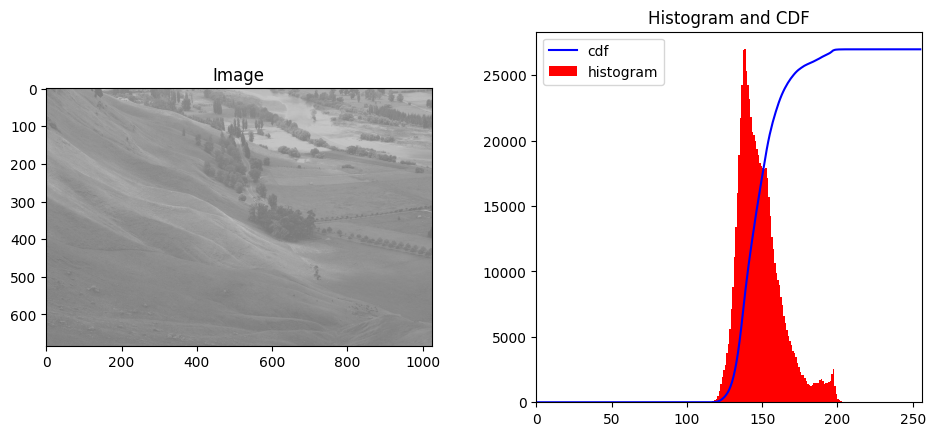

In [3]:
# Load image as grayscale
img = cv2.imread('./images/mountain.jpg', cv2.IMREAD_GRAYSCALE)
# Display the image with Histogram and CDF
plot_img_and_hist(img)

The histogram lies in brighter region. We need the full spectrum. For that, we need a transformation function which maps the input pixels in brighter region to output pixels in full region.

## Histogram equalization

First, calculate histogram and cdf of the image

In [4]:
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()

Now we find the minimum histogram value (excluding 0) and apply the histogram equalization equation:

![Histogram Equalization Formula](./images/histogram_equal.png)

We the masked array concept array from Numpy. For masked array, all operations are performed on non-masked elements.

In [5]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m-cdf_m.min()) * 255 / (cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

Finally, calculate and plot the equalized image

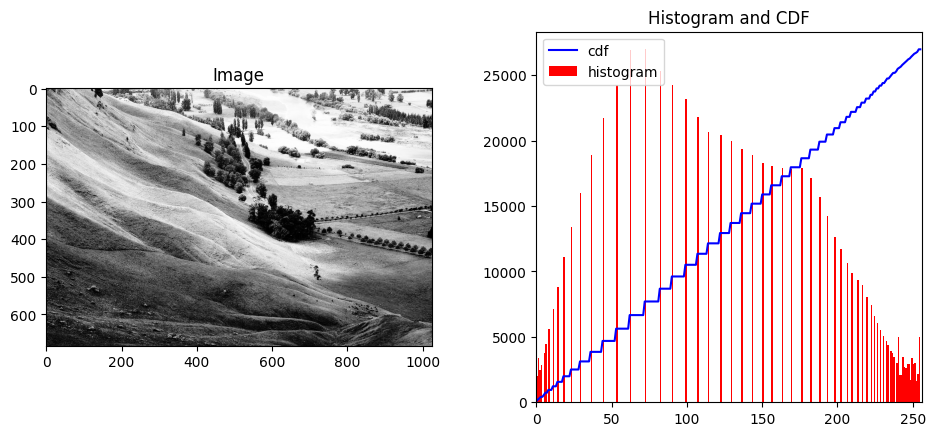

In [6]:
img2 = cdf[img]
plot_img_and_hist(img2)

## References

1. [Histogram Equalization - OpenCV](https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html)

2. [Histogram Equalization - Towards Data Science](https://towardsdatascience.com/histogram-equalization-5d1013626e64)

3. [Histogram Equalization - Viblo](https://viblo.asia/p/tuan-3-histogram-histogram-equalization-3P0lPnxmKox)

4. [Histogram Equalization - Wikipedia](https://en.wikipedia.org/wiki/Histogram_equalization)